# 3.3 2040 여성들의 건강 고민 살피기

In [2]:
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---- ----------------------------------- 2.1/19.4 MB 9.8 MB/s eta 0:00:02
   ------- -------------------------------- 3.7/19.4 MB 8.7 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.4 MB 6.9 MB/s eta 0:00:03
   ---------- ----------------------------- 5.0/19.4 MB 5.9 MB/s eta 0:00:03
   ------------ --------------------------- 6.0/19.4 MB 5.7 MB/s eta 0:00:03
   -------------- ------------------------- 7.1/19.4 MB 5.6 MB/s eta 0:00:03
   ----------------- ---------------------- 8.7/19.4 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 10.2/19.4 MB 6.1 MB/s eta 0:00:02
   ----------------------- ---------------- 11.3/19.4 MB 6.0 MB/s eta 0:00:02
   ------------------------- -------------- 12.6/19.4 MB 6.0 MB/s eta 0:00:02
   ----------------------------- ---------- 14.2/19.4 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 15.5/19.4 MB 6.1 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import re # 정규 표현식

import pandas as pd 
import numpy as np

from kiwipiepy import Kiwi # 형태소 분석
from collections import Counter # 다빈도 단어 분석
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

import seaborn as sns

import calendar

from dateutil.parser import parse

from collections import Counter
from konlpy.tag import Komoran, Okt, Twitter
from pprint import pprint

filepath = './data'
df = pd.read_excel(filepath+"/2장_여성커뮤니티데이터.xlsx")
df.head()

,title,replys,views,date
0,강남다이어트 하체살빼기 셀룰라이트 제거부터 확실히 라인이 달라졌어요,2,391,2022.04.05.
1,발렌티노 쿠션과 입생로랑 쿠션 두개 다 써 보신 분 계실까요?,1,162,2022.04.05.
2,눈썹 반영규 궁금해요!,8,87,2022.04.05.
3,필테 헬스병행,4,90,2022.04.05.
4,남편 피부관리 해주시는 분들,10,109,2022.04.05.


## 3.3.2 데이터분석: 게시물 날짜 정보 구하기

In [2]:
date_sample = "2022.02.26" 

print(parse(date_sample).year)
print(parse(date_sample).month)
print(parse(date_sample).day)

2022
2
26


In [3]:
df['year'] = df['date'].apply(lambda x:parse(x).year)
df['month'] = df['date'].apply(lambda x:parse(x).month)
df['day'] = df['date'].apply(lambda x:parse(x).day)

In [4]:
posting_days = []
for y, m, d in zip(df['year'], df['month'], df['day']):
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    day = days[calendar.weekday(y, m, d)]

    posting_days.append(day)

df['Date_Created'] = posting_days
df.sample(5)

,title,replys,views,date,year,month,day,Date_Created
8224,킨더밸런스를 구입했는데요,1,51,2020.02.21.,2020,2,21,금요일
6860,만성편도선염치료 이제 그만 아프고 싶어요ㅠㅠ,8,357,2020.06.01.,2020,6,1,월요일
8528,피부과 궁금해요~,4,324,2020.01.31.,2020,1,31,금요일
5802,9월부터 시작된 아토피와의 사투 ㅠㅠ..,6,178,2020.09.03.,2020,9,3,목요일
5876,진동 마사지건 효과 있을까요?,6,547,2020.08.26.,2020,8,26,수요일


In [5]:
df['month'].value_counts().sort_index()

month
1     2117
2     1969
3     2169
4     1724
5     1319
6     1165
7     1149
8     1108
9      950
10     971
11    1021
12     997
Name: count, dtype: int64

In [6]:
df['Date_Created'].value_counts()

Date_Created
화요일    2981
월요일    2865
목요일    2792
수요일    2667
금요일    2580
일요일    1459
토요일    1315
Name: count, dtype: int64

(0.0, 2500.0)

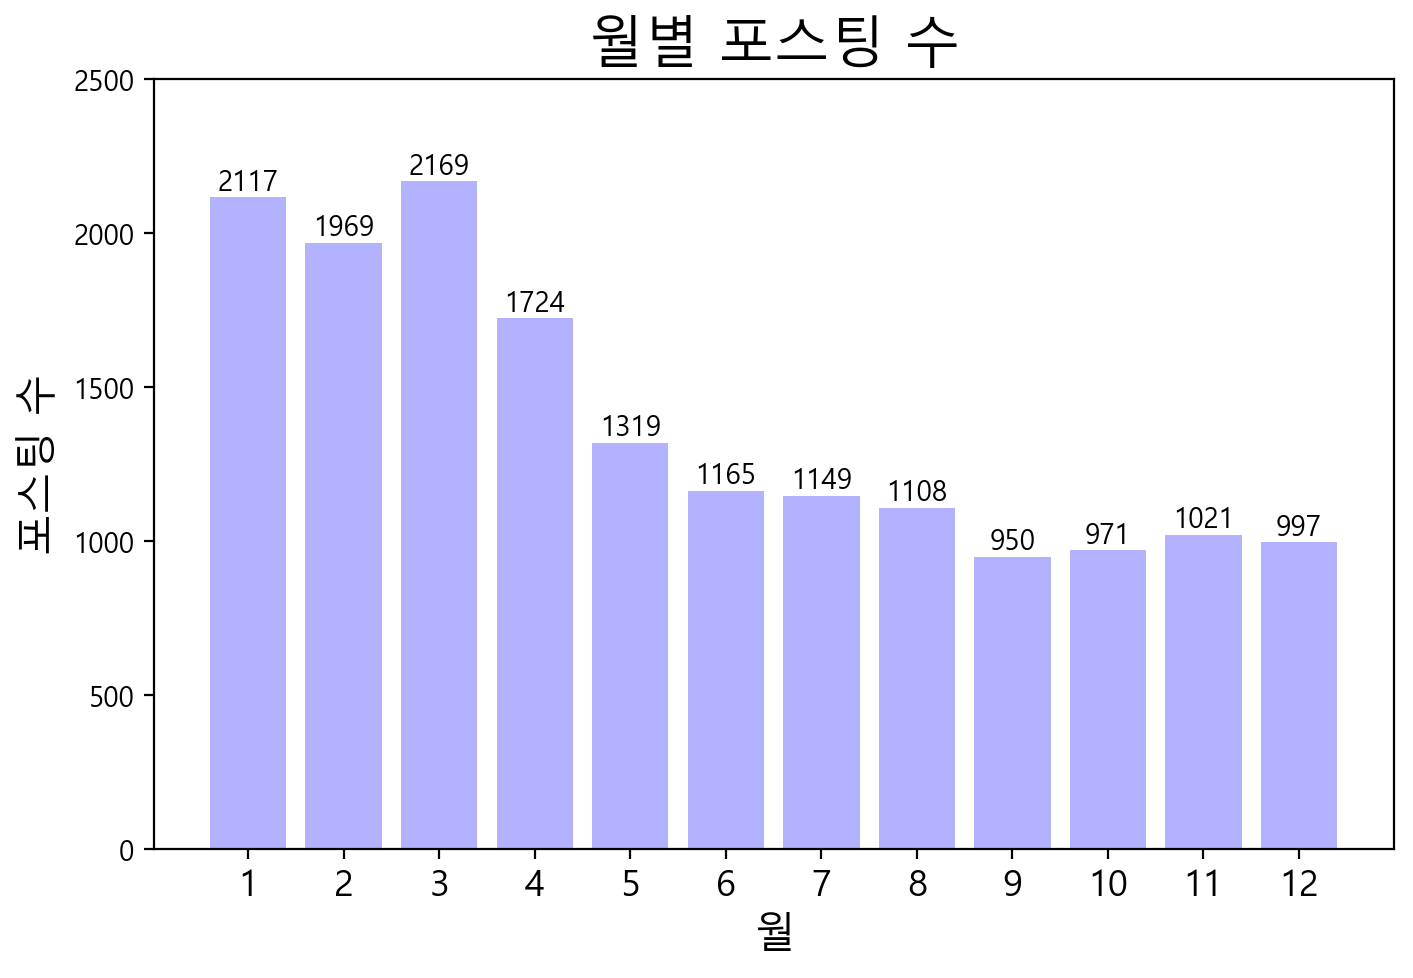

In [7]:
y = df['month'].value_counts().sort_index().values
x = np.arange(1, 13)
plt.figure(figsize=(8, 5))
plt.title("월별 포스팅 수", size=20)
plt.bar(x, y, color='blue', alpha=0.3)

for i, v in enumerate(x):
    plt.text(i+1, y[i], y[i], verticalalignment='bottom', horizontalalignment='center')

plt.xticks(np.arange(1, 13), size=13)

plt.xlabel("월", size=15)
plt.ylabel("포스팅 수", size=15)
plt.ylim(0, 2500)

## 데이터 분석: 포스팅 랭킹 구하기

In [8]:
df['reply_rank'] = df['replys'].rank(ascending=False)
df.sort_values(by='reply_rank', ascending=True)

,title,replys,views,date,year,month,day,Date_Created,reply_rank
1222,리프팅 수술 후 살이 찌면..,932,2.4만,2021.11.27.,2021,11,27,토요일,1.0
12439,펑,910,"7,894",2019.05.06.,2019,5,6,월요일,2.0
13881,비염에 좋다해서 질렀어요~,635,1.1만,2019.03.17.,2019,3,17,일요일,3.0
179,"피부과 시술 좋아하고 많이 받아봐서, 궁금한거 있음 물어보세요!",612,1.6만,2022.03.17.,2022,3,17,목요일,4.0
14562,비염에 좋다고 해서 구매해봄~~~,560,1.4만,2019.02.24.,2019,2,24,일요일,5.0
...,...,...,...,...,...,...,...,...,...
13032,한국 콜마에서 나오는 제가쓰는 신제품 크림인데 할인한다고 해서 공유해요~,0,105,2019.04.10.,2019,4,10,수요일,15587.5
20,"마포구,은평구 pt 잘하는곳 아시나요?",0,14,2022.04.03.,2022,4,3,일요일,15587.5
13068,손톱관리문의^^,0,22,2019.04.09.,2019,4,9,화요일,15587.5
13072,저 이거 신청 했어요 '_',0,201,2019.04.09.,2019,4,9,화요일,15587.5


In [9]:
def calc_View(count):
    """입력된 조회 수에 저장된 값을 숫자로 변환한다"""
    if '만' in count:
        cnt = float(count.replace("만", ''))* 10000
        return cnt

    elif "," in count:
        cnt = float(count.replace(',',''))
        return cnt
    else:
        cnt = float(count)
        return cnt
    
df['views'] = df['views'].astype('str')
df['views'] = df['views'].apply(lambda x:calc_View(x))

df.head(3)


,title,replys,views,date,year,month,day,Date_Created,reply_rank
0,강남다이어트 하체살빼기 셀룰라이트 제거부터 확실히 라인이 달라졌어요,2,391.0,2022.04.05.,2022,4,5,화요일,12157.0
1,발렌티노 쿠션과 입생로랑 쿠션 두개 다 써 보신 분 계실까요?,1,162.0,2022.04.05.,2022,4,5,화요일,13799.0
2,눈썹 반영규 궁금해요!,8,87.0,2022.04.05.,2022,4,5,화요일,5108.5


In [10]:
df['view_rank'] = df['views'].rank(ascending=False)
df.sort_values(by='view_rank', ascending=True)

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank
16471,"필독!!! 정치글금지! 주의 / 분란, 이슈, 정치, 욕, 반말등 [글,덧글 금지]",0,560000.0,2020.08.21.,2020,8,21,금요일,15587.5,1.0
16470,"진행중▶ 체험단, 이벤트 안내 / 4월4일 부터 ~ 4월10일 까지",0,420000.0,2020.12.14.,2020,12,14,월요일,15587.5,2.0
281,김혜수 얼마나 소식하는걸까요,66,28000.0,2022.03.04.,2022,3,4,금요일,115.5,3.0
107,충격적인 햇반 제조과정,136,26000.0,2022.03.24.,2022,3,24,목요일,36.5,4.5
16601,충격적인 햇반 제조과정,136,26000.0,2022.03.24.,2022,3,24,목요일,36.5,4.5
...,...,...,...,...,...,...,...,...,...,...
4764,프로캄 레드엑스크림입술에발라도되나요?,0,6.0,2020.12.20.,2020,12,20,일요일,15587.5,16655.0
14770,약산성 클렌징 구달 카렌둘라 폼&티슈 순해서 좋아,0,6.0,2019.02.19.,2019,2,19,화요일,15587.5,16655.0
14416,라띠에라 위치하젤 세럼 추천해요^^,0,5.0,2019.02.28.,2019,2,28,목요일,15587.5,16657.0
12628,신사역에 헬스괜찮은 곳 있나용?,0,4.0,2019.04.25.,2019,4,25,목요일,15587.5,16658.5


In [11]:
df["Rank"] = df['reply_rank'] + df['view_rank']
df.drop_duplicates(inplace = True)
df.sort_values(by='Rank', ascending=True)[:10]

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
1222,리프팅 수술 후 살이 찌면..,932,24000.0,2021.11.27.,2021,11,27,토요일,1.0,6.0,7.0
1958,리프팅수술.... 찐친들의 반응 ….,417,21000.0,2021.09.13.,2021,9,13,월요일,7.5,8.5,16.0
179,"피부과 시술 좋아하고 많이 받아봐서, 궁금한거 있음 물어보세요!",612,16000.0,2022.03.17.,2022,3,17,목요일,4.0,27.5,31.5
38,들깨가루는 산패가 너무나 잘 되기 때문에 주의하셔야 좋습니다,285,16000.0,2022.03.31.,2022,3,31,목요일,11.5,27.5,39.0
107,충격적인 햇반 제조과정,136,26000.0,2022.03.24.,2022,3,24,목요일,36.5,4.5,41.0
14562,비염에 좋다고 해서 구매해봄~~~,560,14000.0,2019.02.24.,2019,2,24,일요일,5.0,41.0,46.0
1684,이 맛에 운동하고 다이어트 하죠♡,148,17000.0,2021.10.13.,2021,10,13,수요일,30.0,20.0,50.0
5378,10년째 약국에서 일하면서 제일 많이 받은 질문,125,18000.0,2020.10.22.,2020,10,22,목요일,42.0,15.0,57.0
1783,평생 다이어트~~ㅜㅜ,197,14000.0,2021.09.30.,2021,9,30,목요일,17.0,41.0,58.0
881,곤약 다이어트는 정말로 위험합니다,118,18000.0,2022.01.06.,2022,1,6,목요일,45.0,15.0,60.0


In [12]:
df.sort_values(by='Rank', ascending=True)[-10:]

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
15818,페이스필티핏러앰플 주름개선에 딱이야~~~,0,10.0,2019.01.21.,2019,1,21,월요일,15587.5,16648.0,32235.5
13119,셀레피트 라운드 메이커 10초 올인원 케어 쉽게 관리할 수 있어요,0,10.0,2019.04.08.,2019,4,8,월요일,15587.5,16648.0,32235.5
14868,"씨앤트리 듀얼, 스키니, 픽서 기능의 마스카라 3종 비교",0,9.0,2019.02.17.,2019,2,17,일요일,15587.5,16651.0,32238.5
1098,백화점에서 구매한 제품입니다 카톡사기 많아요 휴대전화번호와 인적사항 확인하고 거래하세요~,0,7.0,2021.12.13.,2021,12,13,월요일,15587.5,16652.5,32240.0
14063,오가닉 더마 스킨시그널 아미노 세럼으로 민감성 피부에 수분충전,0,7.0,2019.03.12.,2019,3,12,화요일,15587.5,16652.5,32240.0
4764,프로캄 레드엑스크림입술에발라도되나요?,0,6.0,2020.12.20.,2020,12,20,일요일,15587.5,16655.0,32242.5
14770,약산성 클렌징 구달 카렌둘라 폼&티슈 순해서 좋아,0,6.0,2019.02.19.,2019,2,19,화요일,15587.5,16655.0,32242.5
14416,라띠에라 위치하젤 세럼 추천해요^^,0,5.0,2019.02.28.,2019,2,28,목요일,15587.5,16657.0,32244.5
12628,신사역에 헬스괜찮은 곳 있나용?,0,4.0,2019.04.25.,2019,4,25,목요일,15587.5,16658.5,32246.0
13471,리얼베리어::포맨올인원미스트토너로 스킨케어가 귀찮은 남자친구에게 빠르고 편리하고 순...,0,4.0,2019.03.28.,2019,3,28,목요일,15587.5,16658.5,32246.0


## 데이터 분석: 주요 주제 찾기


In [13]:
df['Rank'].describe()

count    15057.000000
mean     16633.189015
std       8464.842360
min          7.000000
25%       9938.500000
50%      16457.500000
75%      23261.000000
max      32246.000000
Name: Rank, dtype: float64

<Axes: ylabel='Rank'>

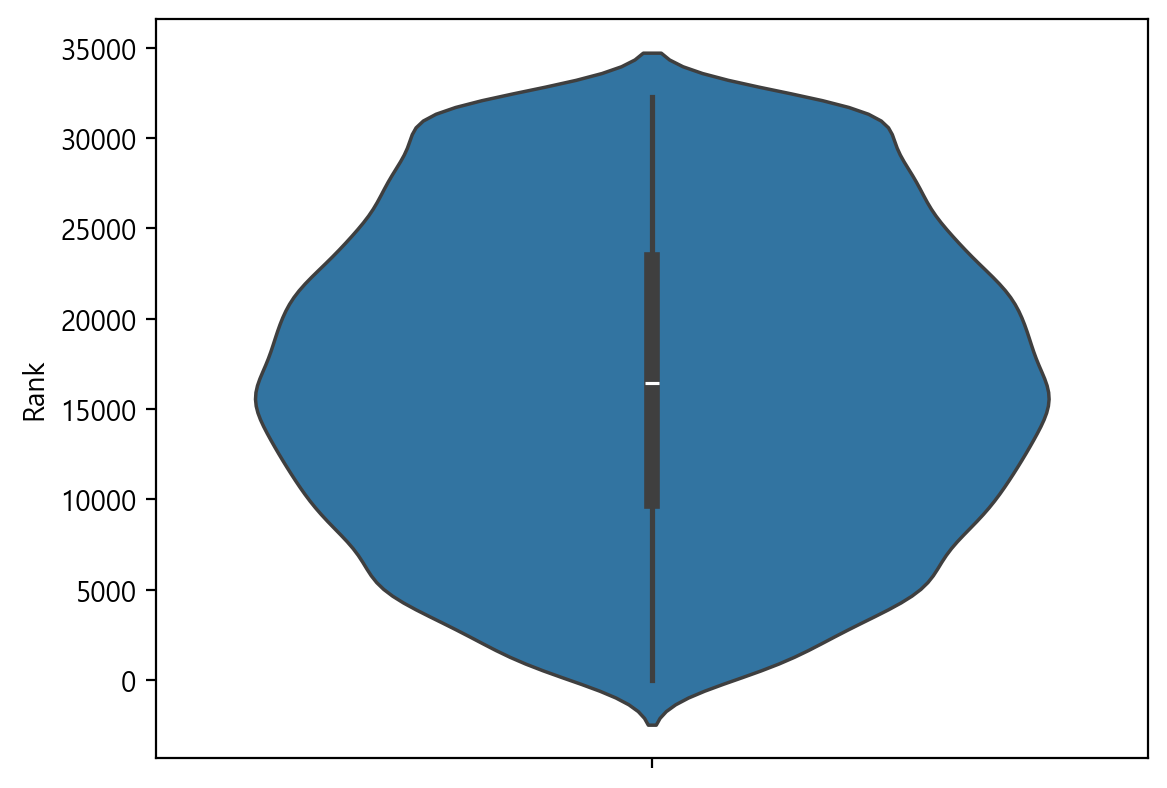

In [14]:
sns.violinplot(data=df, y='Rank')

In [15]:
df_under25 = df[df['Rank'] < 9983]

In [16]:
diet_keyword1 = '다이어트'
diet_keyword2 = '다요' 
diet_keyword3 = '다욧' 

df_under25_diet = df_under25[(df_under25['title'].str.contains(diet_keyword1)) | \
                             (df_under25['title'].str.contains(diet_keyword2)) | \
                                (df_under25['title'].str.contains(diet_keyword3))]
df_under25_diet.sort_values(by="Rank")[:10]

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
1684,이 맛에 운동하고 다이어트 하죠♡,148,17000.0,2021.10.13.,2021,10,13,수요일,30.0,20.0,50.0
1783,평생 다이어트~~ㅜㅜ,197,14000.0,2021.09.30.,2021,9,30,목요일,17.0,41.0,58.0
881,곤약 다이어트는 정말로 위험합니다,118,18000.0,2022.01.06.,2022,1,6,목요일,45.0,15.0,60.0
2549,다욧을 성공하고보니 다욧은 소식하는게 아니더라고요,126,12000.0,2021.07.19.,2021,7,19,월요일,41.0,60.0,101.0
11251,다이어트 성공인거죠??^^,112,12000.0,2019.07.13.,2019,7,13,토요일,50.5,60.0,110.5
5896,다이어트한의원(강남탑or선이고은)추천천해주세요,78,13000.0,2020.08.25.,2020,8,25,화요일,94.0,50.5,144.5
778,다이어트 할려면 이것만큼은 무조건 끊어야한다 말해주세요ㅜㅜ,132,8809.0,2022.01.16.,2022,1,16,일요일,39.0,111.0,150.0
16631,(일상) 간절한 질문 : 다이어트 어떻게 하세요?,156,8162.0,2022.03.22.,2022,3,22,화요일,26.0,126.0,152.0
137,(일상) 간절한 질문 : 다이어트 어떻게 하세요?,156,8161.0,2022.03.22.,2022,3,22,화요일,26.0,127.5,153.5
2209,다이어트 성공이후에 강박..,92,9364.0,2021.08.22.,2021,8,22,일요일,71.0,95.0,166.0


## 형태소 분석 : 명사 추출

In [17]:
okt = Okt()
komoran = Komoran()
twitter = Twitter()

sample_text = "영양제 먹으면서 걷기 운동하니 살이 빠져요"

pprint(okt.pos(sample_text))
pprint(komoran.pos(sample_text))
pprint(twitter.pos(sample_text))

[('영', 'Modifier'),
 ('양제', 'Noun'),
 ('먹으면서', 'Verb'),
 ('걷기', 'Noun'),
 ('운동', 'Noun'),
 ('하니', 'Verb'),
 ('살이', 'Noun'),
 ('빠져요', 'Verb')]
[('영양제', 'NNG'),
 ('먹', 'VV'),
 ('으면서', 'EC'),
 ('걷기', 'NNP'),
 ('운동', 'NNG'),
 ('하', 'XSV'),
 ('니', 'EC'),
 ('살', 'NNB'),
 ('이', 'JKS'),
 ('빠지', 'VV'),
 ('어요', 'EC')]
[('영', 'Modifier'),
 ('양제', 'Noun'),
 ('먹으면서', 'Verb'),
 ('걷기', 'Noun'),
 ('운동', 'Noun'),
 ('하니', 'Verb'),
 ('살이', 'Noun'),
 ('빠져요', 'Verb')]


In [18]:
komoran.nouns(sample_text)

['영양제', '걷기', '운동', '살']

In [21]:
def get_text_only(text):
    """한글, 영어, 숫자만 추출한다"""
    tmp = re.compile('[가-힣a-zA-Z0-9]+').findall(str(text))
    result = ' '.join(tmp)
    return result

text = "다이어트 도와주세요🤗 Diet, 9kg 감량 목표ㅠ"

In [22]:
result = get_text_only(text)
print(result)

다이어트 도와주세요 Diet 9kg 감량 목표


In [23]:
df_under25_diet['re_title'] = df_under25_diet['title'].apply(lambda x:get_text_only(x))
df_under25_diet.sample(3)

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank,re_title
2240,출산 후 다이어트는 어떻게들 하셨나요,13,333.0,2021.08.18.,2021,8,18,수요일,2457.5,6956.5,9414.0,출산 후 다이어트는 어떻게들 하셨나요
2273,40대분들 다이어트 어떻게 하시고 계신가요?,17,1078.0,2021.08.13.,2021,8,13,금요일,1458.5,1290.0,2748.5,40대분들 다이어트 어떻게 하시고 계신가요
16518,다욧하시는분들..,15,307.0,2022.04.02.,2022,4,2,토요일,1891.5,7574.5,9466.0,다욧하시는분들


In [24]:
diet_onesent = " ".join(df_under25_diet['re_title'].tolist())

nouns_diet = []
for noun in komoran.nouns(diet_onesent):
    if len(noun) > 1:
        nouns_diet.append(noun)
    else:
        continue

In [25]:
nouns_diet

['다이어트',
 '다이어트',
 '땅콩 버터',
 '후기',
 '단기',
 '다이어트',
 '한약',
 '요트',
 '아침',
 '식단',
 '다이어트',
 '투자',
 '비용',
 '수영',
 '다이어트',
 '도움',
 '다이어트',
 '일상',
 '질문',
 '다이어트',
 '다이어트',
 '성공',
 '키로',
 '필라테스',
 '다이어트',
 '효과',
 '체중',
 '정체',
 '다이어트',
 '방법',
 '공유',
 '부탁',
 '다이어트',
 '질문',
 '다이어트',
 '성공의 비밀',
 '갑상선',
 '기능',
 '저하',
 '다이어트',
 '다이어트',
 '도전',
 '한약',
 '다이어트',
 '신분',
 '다이어트',
 '간식',
 '과일',
 '프로',
 '다이어트',
 '보조',
 '다이어트',
 '필라테스',
 '헬스',
 '필요',
 '한곳',
 '다이어트',
 '점핑',
 '다이어트',
 '다이어트',
 '한약',
 '부작용',
 '다이어트',
 '제일',
 '운동',
 '다이어트',
 '옆구리',
 '사진',
 '다이어트',
 '생리',
 '지연',
 '다이어트',
 '하시나',
 '다이어트',
 '시작',
 '공유',
 '다이어트',
 '가슴',
 '다이어트',
 '포만감',
 '다이어트',
 '다이어트',
 '방법',
 '단기간',
 '다이어트',
 '방법',
 '다이어트',
 '다이어트',
 '효과',
 '요즘',
 '다이어트',
 '속지',
 '다이어트',
 '작심',
 '삼일',
 '다이어트',
 '엄마',
 '다이어트',
 '식단',
 '만원',
 '가량',
 '효과',
 '다이어트',
 '다이어트',
 '위험',
 '한약',
 '다이어트',
 '효과',
 '중턱',
 '다이어트',
 '걷기',
 '운동',
 '시간',
 '다이어트',
 '임신',
 '다이어트',
 '하시나',
 '다이어트',
 '시작',
 '약국',
 '다이어트',
 '한자리',
 '다이어트',
 '효과',
 '추천',
 '부탁',
 '다이어트'

In [26]:
Counter(nouns_diet).most_common()

[('다이어트', 580),
 ('한약', 68),
 ('효과', 41),
 ('식단', 34),
 ('추천', 28),
 ('시작', 26),
 ('성공', 25),
 ('방법', 20),
 ('운동', 19),
 ('키로', 18),
 ('신분', 16),
 ('약사', 16),
 ('아줌마', 15),
 ('보조', 14),
 ('일차', 13),
 ('가요', 13),
 ('후기', 12),
 ('감량', 12),
 ('의원', 12),
 ('오늘', 10),
 ('부탁', 9),
 ('노하우', 9),
 ('공유', 8),
 ('개월', 8),
 ('유지', 8),
 ('도움', 7),
 ('단기간', 7),
 ('질문', 6),
 ('하시나', 6),
 ('평생', 6),
 ('한방', 6),
 ('요트', 5),
 ('필라테스', 5),
 ('정체', 5),
 ('부작용', 5),
 ('요즘', 5),
 ('간헐', 5),
 ('주차', 5),
 ('고민', 5),
 ('요요', 5),
 ('단기', 4),
 ('체중', 4),
 ('점핑', 4),
 ('제일', 4),
 ('디톡스', 4),
 ('식욕', 4),
 ('산후', 4),
 ('몸무게', 4),
 ('단식', 4),
 ('조언', 4),
 ('저녁', 4),
 ('아침', 3),
 ('간식', 3),
 ('걷기', 3),
 ('시간', 3),
 ('킬로', 3),
 ('건강', 3),
 ('병원', 3),
 ('이후', 3),
 ('점심', 3),
 ('출산', 3),
 ('비법', 3),
 ('정도', 3),
 ('프로그램', 3),
 ('처방', 3),
 ('비만', 3),
 ('계세', 3),
 ('계단', 3),
 ('경험', 3),
 ('음식', 3),
 ('최고', 3),
 ('고지', 3),
 ('관리', 3),
 ('오일', 3),
 ('조절', 3),
 ('결심', 3),
 ('면역력', 3),
 ('방식', 3),
 ('남편', 3),
 ('땅콩 버터', 2),
 (

In [27]:
pt_keyword1 = '운동'
pt_keyword2 = '필라'
pt_keyword3 = '헬스'
pt_keyword4 = '요가'
pt_keyword5 = '피티'
pt_keyword6 = 'PT'

df_under25_pt = df_under25[(df_under25['title'].str.contains(pt_keyword1)) | \
                           (df_under25['title'].str.contains(pt_keyword2)) | \
                            (df_under25['title'].str.contains(pt_keyword3)) | \
                            (df_under25['title'].str.contains(pt_keyword4)) | \
                            (df_under25['title'].str.contains(pt_keyword5)) | \
                            (df_under25['title'].str.contains(pt_keyword6))
                                    ]
df_under25_pt.sort_values(by='Rank')[:10]

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
1684,이 맛에 운동하고 다이어트 하죠♡,148,17000.0,2021.10.13.,2021,10,13,수요일,30.0,20.0,50.0
1904,피티받을때 트레이너들이 원래,71,14000.0,2021.09.18.,2021,9,18,토요일,100.5,41.0,141.5
3545,필라테스. 피티 레깅스 입을때 팬티 ㅠㅠ,56,9804.0,2021.04.13.,2021,4,13,화요일,146.5,86.0,232.5
918,걷기운동 1시간씩 다이어트되나요?,68,8116.0,2022.01.03.,2022,1,3,월요일,109.5,129.0,238.5
10611,필라테스 강사전망,28,4768.0,2019.08.26.,2019,8,26,월요일,491.5,243.0,734.5
6323,한달동안 운동 없이 살 빼려면요,29,1702.0,2020.07.17.,2020,7,17,금요일,457.5,678.0,1135.5
10204,살 빼려고 매일 걷기운동하고 있어요~ 실패없이 성공하는 노하우 뭘까요?,32,1492.0,2019.09.27.,2019,9,27,금요일,379.0,801.0,1180.0
8521,이런 뒷태가 좋아지기 위해서는 어떤 운동을해야할까요?ㅠ,24,1729.0,2020.02.01.,2020,2,1,토요일,704.5,660.0,1364.5
7717,다이어트 조언해주세요!운동해도 안빠짐..,59,1091.0,2020.03.31.,2020,3,31,화요일,137.5,1271.5,1409.0
4302,헬스장 PT 가격.. 원래 이런건가요,17,12000.0,2021.02.03.,2021,2,3,수요일,1458.5,60.0,1518.5


In [28]:
df_under25_pt['re_title'] = df_under25_pt['title'].apply(lambda x:get_text_only(x))
pt_onesent = " ".join(df_under25_pt['re_title'].tolist())
nouns_pt = [noun for noun in komoran.nouns(pt_onesent) if len(noun) > 1]
Counter(nouns_pt).most_common()[:10]

[('운동', 106),
 ('필라테스', 47),
 ('다이어트', 23),
 ('효과', 18),
 ('헬스', 15),
 ('요가', 14),
 ('기구', 10),
 ('정도', 8),
 ('걷기', 7),
 ('근력', 7)]

In [29]:
keyword1 = '운동'
keyword2 = '필라'
keyword3 = '다이어트'
keyword4 = '헬스'
keyword5 = '요가'

df_under25_others = df_under25[~(df_under25['title'].str.contains(keyword1)) & \
                               ~(df_under25['title'].str.contains(keyword2)) & \
                                ~(df_under25['title'].str.contains(keyword3)) & \
                                    ~(df_under25['title'].str.contains(keyword4)) & \
                                        ~(df_under25['title'].str.contains(keyword5))]

df_under25_others['re_title'] = df_under25_others['title'].apply(lambda x:get_text_only(x))
other_onesent = " ".join(df_under25_others['re_title'].tolist())
nouns_other = [noun for noun in komoran.nouns(other_onesent) if len(noun) > 1]
Counter(nouns_other).most_common()[:60]

[('추천', 202),
 ('효과', 129),
 ('피부', 120),
 ('관리', 114),
 ('수술', 102),
 ('가요', 91),
 ('신분', 75),
 ('크림', 75),
 ('지방', 69),
 ('얼굴', 67),
 ('주사', 62),
 ('키로', 61),
 ('주름', 50),
 ('여드름', 50),
 ('방법', 50),
 ('기미', 49),
 ('치료', 47),
 ('부탁', 46),
 ('고민', 43),
 ('마스크', 43),
 ('유산', 43),
 ('가슴', 42),
 ('후기', 40),
 ('시술', 40),
 ('레이저', 39),
 ('눈밑', 39),
 ('머리', 39),
 ('제거', 39),
 ('사진', 38),
 ('필러', 37),
 ('보톡스', 37),
 ('질문', 34),
 ('때문', 33),
 ('병원', 33),
 ('피부과', 32),
 ('탈모', 29),
 ('영양제', 29),
 ('샴푸', 29),
 ('뱃살', 27),
 ('화장품', 27),
 ('재배', 26),
 ('식욕', 26),
 ('눈썹', 26),
 ('헤어', 26),
 ('쌍수', 25),
 ('개월', 25),
 ('30대', 25),
 ('남편', 24),
 ('부작용', 24),
 ('노하우', 24),
 ('요즘', 24),
 ('감량', 24),
 ('콜라겐', 23),
 ('하시나', 23),
 ('단식', 23),
 ('사용', 23),
 ('팔자', 23),
 ('제품', 23),
 ('문신', 23),
 ('간헐', 22)]

In [30]:
other_onesent = " ".join(df_under25_others['re_title'].tolist())
Counter(other_onesent.split()).most_common()[:60]

[('어떻게', 95),
 ('추천해주세요', 87),
 ('분', 84),
 ('있나요', 66),
 ('효과', 62),
 ('좀', 54),
 ('계신가요', 49),
 ('너무', 47),
 ('있을까요', 46),
 ('추천', 44),
 ('진짜', 43),
 ('피부', 41),
 ('혹시', 40),
 ('해보신분', 37),
 ('수술', 36),
 ('얼굴', 35),
 ('관리', 35),
 ('잘', 33),
 ('많이', 33),
 ('알려주세요', 33),
 ('분들', 33),
 ('후', 32),
 ('좋은', 32),
 ('하세요', 30),
 ('봐주세요', 29),
 ('더', 29),
 ('뭐가', 29),
 ('다들', 28),
 ('방법', 27),
 ('보톡스', 27),
 ('유산균', 27),
 ('저', 26),
 ('레이저', 25),
 ('피부관리', 25),
 ('살', 25),
 ('어떤가요', 25),
 ('아시는분', 24),
 ('후기', 23),
 ('살이', 23),
 ('리프팅', 23),
 ('요즘', 23),
 ('같아요', 23),
 ('어떤거', 23),
 ('받고', 22),
 ('기미', 22),
 ('시술', 22),
 ('해주세요', 22),
 ('여드름', 22),
 ('눈밑지방재배치', 21),
 ('피부과', 21),
 ('영양제', 21),
 ('슈링크', 21),
 ('하시나요', 21),
 ('노하우', 20),
 ('어때요', 20),
 ('부탁드려요', 19),
 ('있으신가요', 18),
 ('좋을까요', 18),
 ('왜', 18),
 ('정말', 18)]

## 데이터 불러오기: 트위터

In [31]:
df_tweet = pd.read_excel('./data/다이어트_트윗.xlsx')
df_tweet.sample(3)

,Created At,Hashtags,Tweets
190,Sat Jun 04 04:43:47 +0000 2022,"[{'text': 'rt', 'indices': [19, 22]}, {'text':...",RT @rj0323_js0205: #rt + #follow \n다이어트 성공하면 1...
646,Sat Jun 04 02:23:09 +0000 2022,[],탄수화물억제제 뱃살빼는 가르시니아 약 12개월분 단기 단기간 다이어트 보조제 체지방...
743,Sat Jun 04 02:00:14 +0000 2022,[],@DM1lin_marvel 아놔 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n밀린샘...


## 데이터 전처리 : 맞춤법 교정

In [33]:
!pip install cachetools


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from hanspell import spell_checker

text = "해봤자 안돼는 다이어트 하지말고 저녁이나먹자"
print(spell_checker.check(text))

Checked(result=True, original='해봤자 안돼는 다이어트 하지말고 저녁이나먹자', checked='해봤자 안되는 다이어트하지 말고 저녁이나 먹자', errors=3, words=OrderedDict([('해봤자', 0), ('안되는', 1), ('다이어트하지', 2), ('말고', 2), ('저녁이나', 2), ('먹자', 2)]), time=0.34885501861572266)


In [35]:
print(spell_checker.check(text).checked)

해봤자 안되는 다이어트하지 말고 저녁이나 먹자


In [37]:
def get_kor_text(text):
    """한글만 추출한다"""
    tmp = re.compile('[가-힣]+').findall(str(text))

    result = ' '.join(tmp)

    return result

df_tweet['re_Tweet'] = df_tweet['Tweets'].apply(lambda x:get_kor_text(x))
df_tweet.sample(3)

,Created At,Hashtags,Tweets,re_Tweet
930,Sat Jun 04 01:03:52 +0000 2022,[],RT @seonho_kim_: #성북동#카페#데이트...#고마워#놀아줘서#운동하고#...,성북동 카페 데이트 고마워 놀아줘서 운동하고 케잌 다이어트는 내일부터 요롱이
658,Sat Jun 04 02:20:20 +0000 2022,[],RT @Ghiblibli1: 트위터가 오늘 벗은 애니 캐릭터 보여줬는데 블락하면 y...,트위터가 오늘 벗은 애니 캐릭터 보여줬는데 블락하면 인거 들켜서 성형 다이어트 트윗...
562,Sat Jun 04 02:54:38 +0000 2022,[],다이어트중에 파스타먹어도되나요?,다이어트중에 파스타먹어도되나요


In [38]:
def checkGrammer(text):
    """맞춤법 교정"""

    txt = spell_checker.check(text)
    result = txt.checked

    return result

df_tweet['check_Tweet'] = df_tweet['re_Tweet'].apply(lambda x:checkGrammer(x))
df_tweet.sample(3)

,Created At,Hashtags,Tweets,re_Tweet,check_Tweet
721,Sat Jun 04 02:05:51 +0000 2022,[],슬림레시피 (900mgx60정)1개월분 하루 두알 다이어트 가르시니아캄보지아껍질추출...,슬림레시피 정 개월분 하루 두알 다이어트 가르시니아캄보지아껍질추출물 파트너스 활동으...,슬림 레시피 정 개월분 하루 두 알 다이어트 가르시니아캄보지아 껍질 추출물 파트너스...
718,Sat Jun 04 02:06:02 +0000 2022,[],RT @keepmxx: 형님 이녀석 하루종일허니콤보엽떡에중국당면추가마라탕에흑당밀크티...,형님 이녀석 하루종일허니콤보엽떡에중국당면추가마라탕에흑당밀크티당도 무제한제공해서 다이...,형님 이 녀석 하루종일허니콤보엽떡에중국당면추가마라탕에흑당밀크티당도 무제한 제공해서 ...
456,Sat Jun 04 03:28:36 +0000 2022,[],RT @euncho__: 운동에 미쳐가는 과정\n\n입문-진짜 솔직히 너무 가기 싫...,운동에 미쳐가는 과정 입문 진짜 솔직히 너무 가기 싫은데 그래도 꾸역꾸역 나간다 몸...,운동에 미쳐가는 과정 입문 진짜 솔직히 너무 가기 싫은데 그래도 꾸역꾸역 나간다 몸...


## 데이터 전처리 : 명사 추출

In [39]:
from konlpy.tag import Komoran

komoran = Komoran()
df_tweet.drop_duplicates(subset='check_Tweet', inplace=True)

tweet_onesent = " ".join(df_tweet['check_Tweet'].to_list())

nouns_tweets = [noun for noun in komoran.nouns(tweet_onesent) if len(noun) > 1]
print(nouns_tweets[:3])

['엄마', '다이어트', '잔소리']
